In [2]:
#Load the dataset
import pandas as pd
df = pd.read_csv("D:/New folder/bank-full.csv", sep=';')

In [3]:
#Shape of the dataset (rows, columns)
print(df.shape)

(45211, 17)


In [4]:
#Columns names
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'loan acception']


In [5]:
#First 5 Rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,loan acception
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Check missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
loan acception    0
dtype: int64


In [7]:
# Summary statistics
print(df[['age']].describe())

                age
count  45211.000000
mean      40.936210
std       10.618762
min       18.000000
25%       33.000000
50%       39.000000
75%       48.000000
max       95.000000


In [8]:
# Unique job
print(df['job'].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [9]:
#Unique Marital Status 
print(df['marital'].value_counts())

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [10]:
# Check target variable
print(df['loan acception'].value_counts())

loan acception
no     39922
yes     5289
Name: count, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Histogram for Age distribution

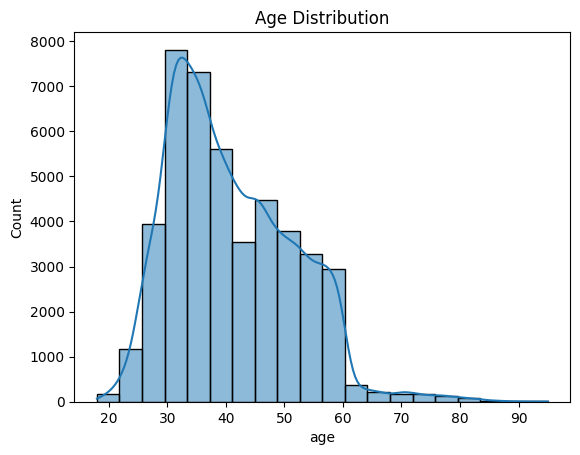

In [13]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [14]:
# Countplot for Job

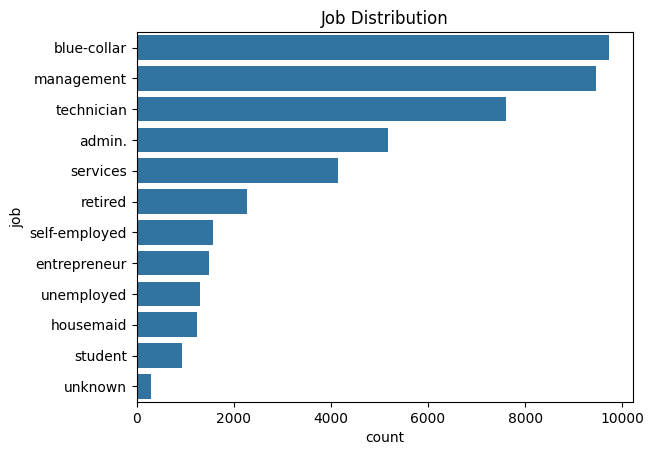

In [15]:
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.show()


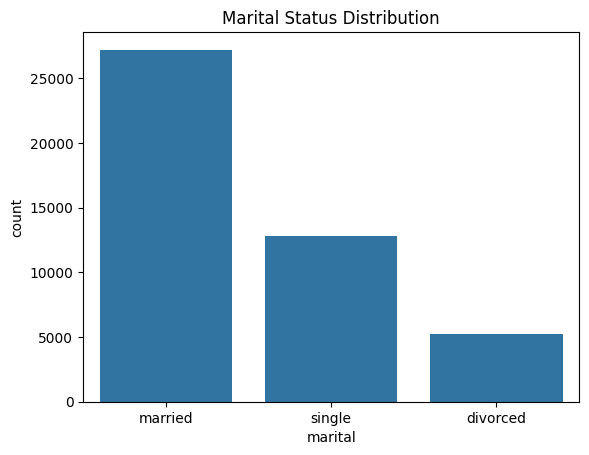

In [16]:
# Countplot for Marital Status
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution')
plt.show()

In [17]:
#Step 1:Label Encoding
from sklearn.preprocessing import LabelEncoder

# Encode target
df['loan acception'] = df['loan acception'].map({'yes':1, 'no':0})

# Encode categorical columns
df_encoded = pd.get_dummies(df[['age', 'job', 'marital']], drop_first=True)

# Add target
df_encoded['loan acception'] = df['loan acception']

df_encoded.head()


,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,loan acception
0,58,False,False,False,True,False,False,False,False,False,False,False,True,False,0
1,44,False,False,False,False,False,False,False,False,True,False,False,False,True,0
2,33,False,True,False,False,False,False,False,False,False,False,False,True,False,0
3,47,True,False,False,False,False,False,False,False,False,False,False,True,False,0
4,33,False,False,False,False,False,False,False,False,False,False,True,False,True,0


In [18]:
#Step 2: Train-test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop('loan acception', axis=1)
y = df_encoded['loan acception']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
#Shape after Splitting
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Training features shape: (31647, 14)
Test features shape: (13564, 14)


In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [22]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 88.21%


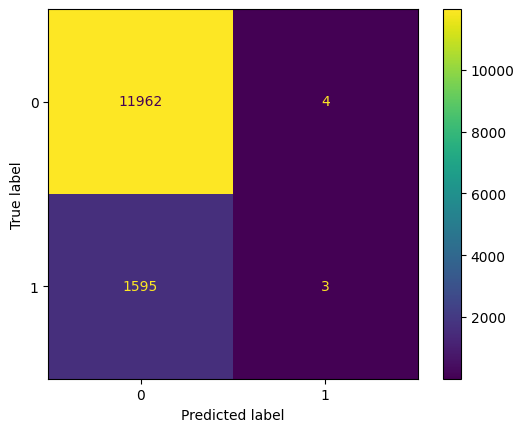

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [24]:
# For Decision Tree, feature importance:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

              Feature  Importance
0                 age    0.718447
13     marital_single    0.143193
1     job_blue-collar    0.047473
8         job_student    0.038976
4      job_management    0.032938
11        job_unknown    0.010336
6   job_self-employed    0.008073
12    marital_married    0.000564
2    job_entrepreneur    0.000000
3       job_housemaid    0.000000
5         job_retired    0.000000
7        job_services    0.000000
9      job_technician    0.000000
10     job_unemployed    0.000000


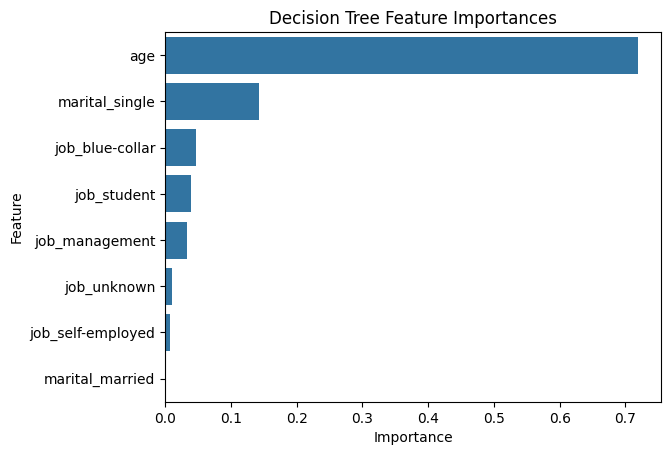

In [27]:
# Plot feature importances
importances_nonzero = importances[importances['Importance'] > 0]

sns.barplot(
    x='Importance',
    y='Feature',
    data=importances_nonzero,
   
)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
